In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from mlxtend.preprocessing import shuffle_arrays_unison
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


In [216]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv(url, names=names)




In [217]:
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [218]:
df = df.sample(frac=1).reset_index(drop=True)


In [219]:
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,4,137,84,0,0,31.2,0.252,30,0
1,4,132,0,0,0,32.9,0.302,23,1
2,3,111,90,12,78,28.4,0.495,29,0
3,0,181,88,44,510,43.3,0.222,26,1
4,2,93,64,32,160,38.0,0.674,23,1
...,...,...,...,...,...,...,...,...,...
763,7,196,90,0,0,39.8,0.451,41,1
764,2,107,74,30,100,33.6,0.404,23,0
765,1,119,54,13,50,22.3,0.205,24,0
766,2,128,78,37,182,43.3,1.224,31,1


In [220]:
for cols in df.columns:
    
    print(df[cols].value_counts())
    print(df[cols].dtypes)
    print()

preg
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
17      1
15      1
Name: count, dtype: int64
int64

plas
100    17
99     17
106    14
129    14
125    14
       ..
177     1
186     1
191     1
72      1
44      1
Name: count, Length: 136, dtype: int64
int64

pres
70     57
74     52
68     45
78     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
82     30
66     30
88     25
84     23
90     22
58     21
86     21
50     13
56     12
54     11
52     11
75      8
92      8
65      7
94      6
85      6
48      5
44      4
96      4
106     3
98      3
100     3
110     3
46      2
104     2
30      2
55      2
108     2
102     1
114     1
38      1
122     1
61      1
95      1
40      1
24      1
Name: count, dtype: int64
int64

skin
0     227
32     31
30     27
27     23
23     22
18     20
33     20
28     20
31     19
39     18
19     18
29     1

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [222]:
df['class'].value_counts()

class
0    500
1    268
Name: count, dtype: int64

## R1

In [223]:
length=len(df)
length

768

In [224]:
train_df,other_df=df.iloc[:int(768*0.6),:],df.iloc[int(768*0.6):,:]

In [225]:
train_df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,4,137,84,0,0,31.2,0.252,30,0
1,4,132,0,0,0,32.9,0.302,23,1
2,3,111,90,12,78,28.4,0.495,29,0
3,0,181,88,44,510,43.3,0.222,26,1
4,2,93,64,32,160,38.0,0.674,23,1
...,...,...,...,...,...,...,...,...,...
455,4,96,56,17,49,20.8,0.340,26,0
456,2,91,62,0,0,27.3,0.525,22,0
457,2,122,60,18,106,29.8,0.717,22,0
458,3,113,50,10,85,29.5,0.626,25,0


In [226]:
val_df,test_df=other_df.iloc[:int(768*0.2),:],other_df.iloc[int(768*0.2):,:]

In [227]:
val_df

,preg,plas,pres,skin,test,mass,pedi,age,class
460,6,125,78,31,0,27.6,0.565,49,1
461,0,102,75,23,0,0.0,0.572,21,0
462,7,179,95,31,0,34.2,0.164,60,0
463,7,159,66,0,0,30.4,0.383,36,1
464,4,115,72,0,0,28.9,0.376,46,1
...,...,...,...,...,...,...,...,...,...
608,3,180,64,25,70,34.0,0.271,26,0
609,5,124,74,0,0,34.0,0.220,38,1
610,11,155,76,28,150,33.3,1.353,51,1
611,0,100,70,26,50,30.8,0.597,21,0


In [228]:
test_df

,preg,plas,pres,skin,test,mass,pedi,age,class
613,9,156,86,0,0,24.8,0.230,53,1
614,2,120,54,0,0,26.8,0.455,27,0
615,4,154,72,29,126,31.3,0.338,37,0
616,0,101,65,28,0,24.6,0.237,22,0
617,7,184,84,33,0,35.5,0.355,41,1
...,...,...,...,...,...,...,...,...,...
763,7,196,90,0,0,39.8,0.451,41,1
764,2,107,74,30,100,33.6,0.404,23,0
765,1,119,54,13,50,22.3,0.205,24,0
766,2,128,78,37,182,43.3,1.224,31,1


In [229]:
train_df.reset_index(inplace=True,drop=True)
val_df.reset_index(inplace=True,drop=True)
test_df.reset_index(inplace=True,drop=True)

In [230]:
train_df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,4,137,84,0,0,31.2,0.252,30,0
1,4,132,0,0,0,32.9,0.302,23,1
2,3,111,90,12,78,28.4,0.495,29,0
3,0,181,88,44,510,43.3,0.222,26,1
4,2,93,64,32,160,38.0,0.674,23,1
...,...,...,...,...,...,...,...,...,...
455,4,96,56,17,49,20.8,0.340,26,0
456,2,91,62,0,0,27.3,0.525,22,0
457,2,122,60,18,106,29.8,0.717,22,0
458,3,113,50,10,85,29.5,0.626,25,0


In [231]:
train_df.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [232]:
numerical_cols=list(train_df.select_dtypes(include= np.number).columns)

In [233]:
numerical_cols

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [234]:
scaler=MinMaxScaler()


In [235]:
train_df=pd.DataFrame(scaler.fit_transform(train_df),columns=train_df.columns)

In [236]:
train_df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,0.235294,0.688442,0.688525,0.000000,0.000000,0.464978,0.095868,0.187500,0.0
1,0.235294,0.663317,0.000000,0.000000,0.000000,0.490313,0.123416,0.041667,1.0
2,0.176471,0.557789,0.737705,0.121212,0.114706,0.423249,0.229752,0.166667,0.0
3,0.000000,0.909548,0.721311,0.444444,0.750000,0.645306,0.079339,0.104167,1.0
4,0.117647,0.467337,0.524590,0.323232,0.235294,0.566319,0.328375,0.041667,1.0
...,...,...,...,...,...,...,...,...,...
455,0.235294,0.482412,0.459016,0.171717,0.072059,0.309985,0.144353,0.104167,0.0
456,0.117647,0.457286,0.508197,0.000000,0.000000,0.406855,0.246281,0.020833,0.0
457,0.117647,0.613065,0.491803,0.181818,0.155882,0.444113,0.352066,0.020833,0.0
458,0.176471,0.567839,0.409836,0.101010,0.125000,0.439642,0.301928,0.083333,0.0


In [237]:
X_train,Y_train=train_df.iloc[:,:-1],train_df.iloc[:,-1]
X_test,Y_test=test_df.iloc[:,:-1],test_df.iloc[:,-1]
X_val,Y_val=val_df.iloc[:,:-1],val_df.iloc[:,-1]

In [238]:
X_train

,preg,plas,pres,skin,test,mass,pedi,age
0,0.235294,0.688442,0.688525,0.000000,0.000000,0.464978,0.095868,0.187500
1,0.235294,0.663317,0.000000,0.000000,0.000000,0.490313,0.123416,0.041667
2,0.176471,0.557789,0.737705,0.121212,0.114706,0.423249,0.229752,0.166667
3,0.000000,0.909548,0.721311,0.444444,0.750000,0.645306,0.079339,0.104167
4,0.117647,0.467337,0.524590,0.323232,0.235294,0.566319,0.328375,0.041667
...,...,...,...,...,...,...,...,...
455,0.235294,0.482412,0.459016,0.171717,0.072059,0.309985,0.144353,0.104167
456,0.117647,0.457286,0.508197,0.000000,0.000000,0.406855,0.246281,0.020833
457,0.117647,0.613065,0.491803,0.181818,0.155882,0.444113,0.352066,0.020833
458,0.176471,0.567839,0.409836,0.101010,0.125000,0.439642,0.301928,0.083333


In [239]:
for col in X_train:
    X_train[col]=X_train[col].astype('float')
for col in Y_train:
    Y_train[col]=Y_train[col].astype('float')

C:\Users\DELL\AppData\Local\Temp\ipykernel_3836\2417599505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col]=X_train[col].astype('float')
C:\Users\DELL\AppData\Local\Temp\ipykernel_3836\2417599505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col]=X_train[col].astype('float')
C:\Users\DELL\AppData\Local\Temp\ipykernel_3836\2417599505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

## R2

In [240]:

class Perceptronn:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def train(self, X, y):
        self.weights = np.zeros(X.shape[1] + 1)  # +1 for bias
        self.errors = []

        unique_classes = np.unique(y)  # Calculate unique classes
        self.unique_classes = unique_classes  # Store them for later use

        for _ in range(self.epochs):
            print(f'Epoch {_+1}')
            error = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update  # Update bias
                error += int(update != 0.0)
            self.errors.append(error)
        return self

    def predict(self, X):
        activation = np.dot(X, self.weights[1:]) + self.weights[0]

        # Use stored unique classes for mapping
        return np.where(activation >= 0.0, self.unique_classes[0], self.unique_classes[1])


def f1_measuree(y_true, y_pred):
    categories = np.unique(np.concatenate((y_true, y_pred)))
    f1_scores = {}
    
    for category in categories:
        true_positives = np.sum(np.logical_and(y_true == category, y_pred == category))
        false_positives = np.sum(np.logical_and(y_true != category, y_pred == category))
        false_negatives = np.sum(np.logical_and(y_true == category, y_pred != category))
        
        precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else 0
        recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) != 0 else 0
        
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
        
        f1_scores[category] = f1
    
    return f1_scores


# Example usage




In [241]:
model = Perceptronn(learning_rate=0.01, epochs=100)
model.train(np.array(X_train), np.array(Y_train))

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch 51
Epoch 52
Epoch 53
Epoch 54
Epoch 55
Epoch 56
Epoch 57
Epoch 58
Epoch 59
Epoch 60
Epoch 61
Epoch 62
Epoch 63
Epoch 64
Epoch 65
Epoch 66
Epoch 67
Epoch 68
Epoch 69
Epoch 70
Epoch 71
Epoch 72
Epoch 73
Epoch 74
Epoch 75
Epoch 76
Epoch 77
Epoch 78
Epoch 79
Epoch 80
Epoch 81
Epoch 82
Epoch 83
Epoch 84
Epoch 85
Epoch 86
Epoch 87
Epoch 88
Epoch 89
Epoch 90
Epoch 91
Epoch 92
Epoch 93
Epoch 94
Epoch 95
Epoch 96
Epoch 97
Epoch 98
Epoch 99
Epoch 100


In [242]:
test_df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,9,156,86,0,0,24.8,0.230,53,1
1,2,120,54,0,0,26.8,0.455,27,0
2,4,154,72,29,126,31.3,0.338,37,0
3,0,101,65,28,0,24.6,0.237,22,0
4,7,184,84,33,0,35.5,0.355,41,1
...,...,...,...,...,...,...,...,...,...
150,7,196,90,0,0,39.8,0.451,41,1
151,2,107,74,30,100,33.6,0.404,23,0
152,1,119,54,13,50,22.3,0.205,24,0
153,2,128,78,37,182,43.3,1.224,31,1


In [243]:
X_test

,preg,plas,pres,skin,test,mass,pedi,age
0,9,156,86,0,0,24.8,0.230,53
1,2,120,54,0,0,26.8,0.455,27
2,4,154,72,29,126,31.3,0.338,37
3,0,101,65,28,0,24.6,0.237,22
4,7,184,84,33,0,35.5,0.355,41
...,...,...,...,...,...,...,...,...
150,7,196,90,0,0,39.8,0.451,41
151,2,107,74,30,100,33.6,0.404,23
152,1,119,54,13,50,22.3,0.205,24
153,2,128,78,37,182,43.3,1.224,31


In [244]:
Y_test

0      1
1      0
2      0
3      0
4      1
      ..
150    1
151    0
152    0
153    1
154    0
Name: class, Length: 155, dtype: int64

In [245]:
pred_test=model.predict(X_test)

In [246]:
pred_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

F1 measure for test predicted data

In [247]:
print(f1_measuree(y_true=Y_test, y_pred=pred_test))

{0.0: 0.8345864661654135, 1.0: 0}


## R3

In [248]:
sm = SMOTE(sampling_strategy=1.0,random_state=42, k_neighbors=5)
X_train_sm, Y_train_sm= sm.fit_resample(X_train, Y_train)


In [250]:
X_train_sm.shape,Y_train_sm.shape

((588, 8), (588,))

In [251]:
X_train.shape,Y_train.shape

((460, 8), (460,))

In [252]:
np.unique(Y_train_sm)

array([0., 1.])

In [253]:
# X_train_sm,Y_train_sm=shuffle_arrays_unison(arrays=[X_train_sm,Y_train_sm],random_seed=42)

In [254]:
model2 = Perceptronn(learning_rate=0.01, epochs=100)
model2.train(np.array(X_train_sm), np.array(Y_train_sm))

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch 51
Epoch 52
Epoch 53
Epoch 54
Epoch 55
Epoch 56
Epoch 57
Epoch 58
Epoch 59
Epoch 60
Epoch 61
Epoch 62
Epoch 63
Epoch 64
Epoch 65
Epoch 66
Epoch 67
Epoch 68
Epoch 69
Epoch 70
Epoch 71
Epoch 72
Epoch 73
Epoch 74
Epoch 75
Epoch 76
Epoch 77
Epoch 78
Epoch 79
Epoch 80
Epoch 81
Epoch 82
Epoch 83
Epoch 84
Epoch 85
Epoch 86
Epoch 87
Epoch 88
Epoch 89
Epoch 90
Epoch 91
Epoch 92
Epoch 93
Epoch 94
Epoch 95
Epoch 96
Epoch 97
Epoch 98
Epoch 99
Epoch 100


In [255]:
pred_test2=model2.predict(X_test)

In [256]:
pred_test2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [257]:
print(f1_measuree(y_true=Y_test, y_pred=pred_test2))

{0.0: 0.8345864661654135, 1.0: 0}


## R4

## R5

In [258]:
X_train_sm.shape,Y_train_sm.shape

((588, 8), (588,))

In [259]:
pd.concat([pd.DataFrame(X_train_sm,columns=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']),pd.DataFrame(Y_train_sm,columns=["class"])],axis=1)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,0.235294,0.688442,0.688525,0.000000,0.000000,0.464978,0.095868,0.187500,0.0
1,0.235294,0.663317,0.000000,0.000000,0.000000,0.490313,0.123416,0.041667,1.0
2,0.176471,0.557789,0.737705,0.121212,0.114706,0.423249,0.229752,0.166667,0.0
3,0.000000,0.909548,0.721311,0.444444,0.750000,0.645306,0.079339,0.104167,1.0
4,0.117647,0.467337,0.524590,0.323232,0.235294,0.566319,0.328375,0.041667,1.0
...,...,...,...,...,...,...,...,...,...
583,0.135185,0.509254,0.538540,0.238159,0.134326,0.494534,0.437832,0.139622,1.0
584,0.352941,0.616000,0.595440,0.000000,0.000000,0.414396,0.153113,0.176053,1.0
585,0.411765,0.833145,0.467256,0.338410,0.298075,0.477579,0.241490,0.383944,1.0
586,0.450707,0.599478,0.551836,0.000000,0.000000,0.495729,0.171030,0.458188,1.0


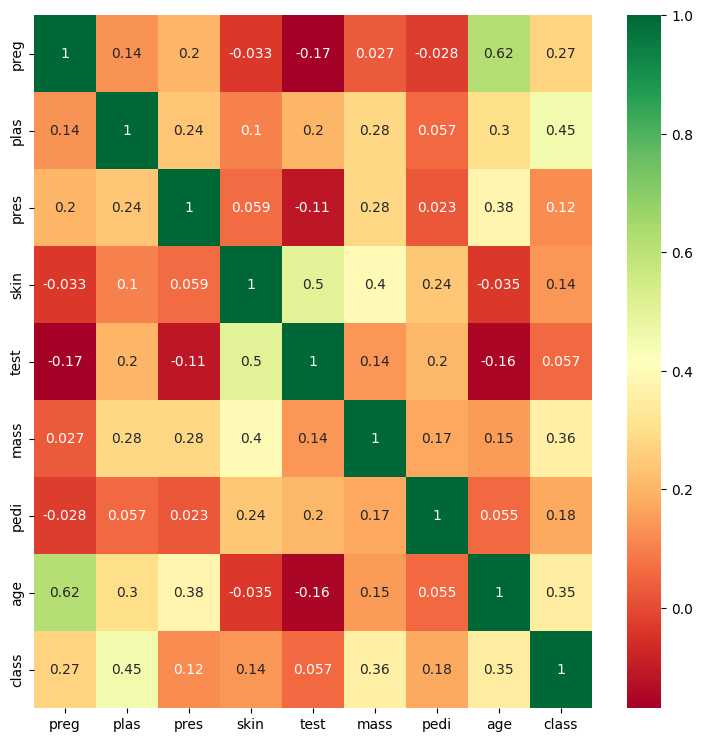

In [260]:
plt.figure(figsize=(9,9))
sns.heatmap(pd.concat([pd.DataFrame(X_train_sm,columns=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']),pd.DataFrame(Y_train_sm,columns=["class"])],axis=1).corr(method='spearman'),annot=True,cmap="RdYlGn")
plt.show()

In [261]:
X_train_sm=pd.DataFrame(X_train_sm,columns=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'])

In [262]:
X_train_sm

,preg,plas,pres,skin,test,mass,pedi,age
0,0.235294,0.688442,0.688525,0.000000,0.000000,0.464978,0.095868,0.187500
1,0.235294,0.663317,0.000000,0.000000,0.000000,0.490313,0.123416,0.041667
2,0.176471,0.557789,0.737705,0.121212,0.114706,0.423249,0.229752,0.166667
3,0.000000,0.909548,0.721311,0.444444,0.750000,0.645306,0.079339,0.104167
4,0.117647,0.467337,0.524590,0.323232,0.235294,0.566319,0.328375,0.041667
...,...,...,...,...,...,...,...,...
583,0.135185,0.509254,0.538540,0.238159,0.134326,0.494534,0.437832,0.139622
584,0.352941,0.616000,0.595440,0.000000,0.000000,0.414396,0.153113,0.176053
585,0.411765,0.833145,0.467256,0.338410,0.298075,0.477579,0.241490,0.383944
586,0.450707,0.599478,0.551836,0.000000,0.000000,0.495729,0.171030,0.458188


In [263]:
X_train_sm_new=X_train_sm.drop(columns=["test" ,"skin"],axis=1)

In [264]:
X_train_sm_new

,preg,plas,pres,mass,pedi,age
0,0.235294,0.688442,0.688525,0.464978,0.095868,0.187500
1,0.235294,0.663317,0.000000,0.490313,0.123416,0.041667
2,0.176471,0.557789,0.737705,0.423249,0.229752,0.166667
3,0.000000,0.909548,0.721311,0.645306,0.079339,0.104167
4,0.117647,0.467337,0.524590,0.566319,0.328375,0.041667
...,...,...,...,...,...,...
583,0.135185,0.509254,0.538540,0.494534,0.437832,0.139622
584,0.352941,0.616000,0.595440,0.414396,0.153113,0.176053
585,0.411765,0.833145,0.467256,0.477579,0.241490,0.383944
586,0.450707,0.599478,0.551836,0.495729,0.171030,0.458188


In [265]:
model3 = Perceptronn(learning_rate=0.01, epochs=100)
model3.train(np.array(X_train_sm_new), np.array(Y_train_sm))

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch 51
Epoch 52
Epoch 53
Epoch 54
Epoch 55
Epoch 56
Epoch 57
Epoch 58
Epoch 59
Epoch 60
Epoch 61
Epoch 62
Epoch 63
Epoch 64
Epoch 65
Epoch 66
Epoch 67
Epoch 68
Epoch 69
Epoch 70
Epoch 71
Epoch 72
Epoch 73
Epoch 74
Epoch 75
Epoch 76
Epoch 77
Epoch 78
Epoch 79
Epoch 80
Epoch 81
Epoch 82
Epoch 83
Epoch 84
Epoch 85
Epoch 86
Epoch 87
Epoch 88
Epoch 89
Epoch 90
Epoch 91
Epoch 92
Epoch 93
Epoch 94
Epoch 95
Epoch 96
Epoch 97
Epoch 98
Epoch 99
Epoch 100


In [266]:
X_test=pd.DataFrame(X_test,columns=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'])
X_test_new=X_test.drop(columns=["test" ,"skin"],axis=1)
pred_test3=model3.predict(X_test_new)
pred_test3

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [267]:
print(f1_measuree(y_true=Y_test, y_pred=pred_test3))

{0.0: 0.8345864661654135, 1.0: 0}


## R6

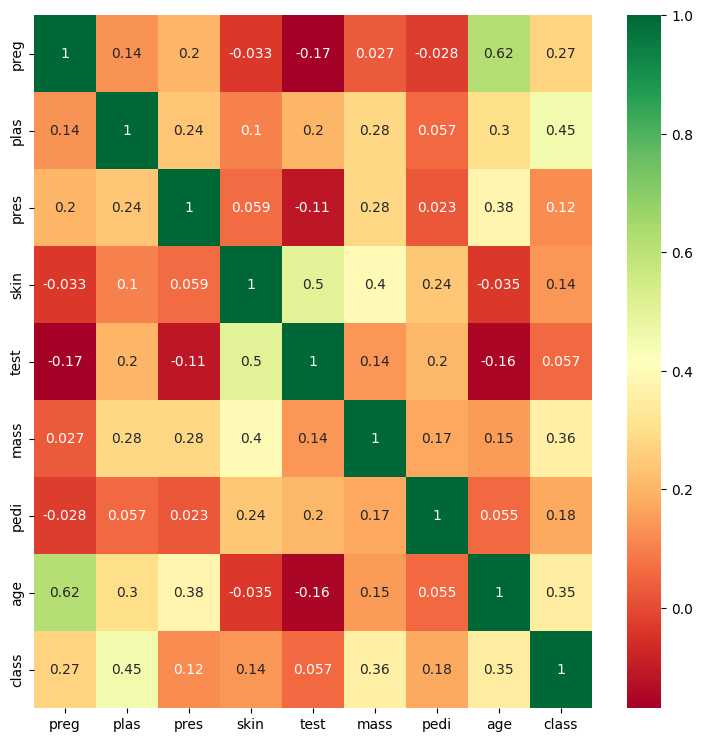

In [268]:
plt.figure(figsize=(9,9))
sns.heatmap(pd.concat([X_train_sm,pd.DataFrame(Y_train_sm,columns=["class"])],axis=1).corr(method='spearman'),annot=True,cmap="RdYlGn")
plt.show()

## R7

In [269]:
X_val.drop(columns=["test","skin"],axis=1,inplace=True)

In [279]:

class Perceptronn:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1] + 1)  # +1 for bias
        self.errors = []

        unique_classes = np.unique(y)  # Calculate unique classes
        self.unique_classes = unique_classes  # Store them for later use

        for _ in range(self.epochs):
            print(f'Epoch {_+1}')
            error = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update  # Update bias
                error += int(update != 0.0)
            self.errors.append(error)
        return self

    def predict(self, X):
        activation = np.dot(X, self.weights[1:]) + self.weights[0]

        # Use stored unique classes for mapping
        return np.where(activation >= 0.0, self.unique_classes[0], self.unique_classes[1])

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

    def get_params(self, deep=True):
        return {'learning_rate': self.learning_rate, 'epochs': self.epochs}


In [280]:


# Define the pipeline
pipeline = Pipeline([
    ('sampling', SMOTE()),
    ('classifier', Perceptronn())
])

# Define parameter grid
param_grid = {
    'sampling__sampling_strategy': [0.5, 0.75, 1.0],  # Adjust sampling_strategy
    'sampling__k_neighbors': [5,6],
    'classifier__learning_rate': [0.001],  # Example parameters for Perceptron
    'classifier__epochs': [50]  # Example parameters for Perceptron
}
# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the data
grid_search.fit(np.array(X_val), np.array(Y_val))

# Print the best parameters
print("Best parameters:", grid_search.best_params_)


Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
E

C:\Users\DELL\anaconda3\envs\college_project\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\envs\college_project\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\envs\college_project\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\DELL\anaconda3\envs\college_project\lib\site-packages\imblearn\pipeline.py", line 322, in fi

In [281]:
X_train

,preg,plas,pres,skin,test,mass,pedi,age
0,0.235294,0.688442,0.688525,0.000000,0.000000,0.464978,0.095868,0.187500
1,0.235294,0.663317,0.000000,0.000000,0.000000,0.490313,0.123416,0.041667
2,0.176471,0.557789,0.737705,0.121212,0.114706,0.423249,0.229752,0.166667
3,0.000000,0.909548,0.721311,0.444444,0.750000,0.645306,0.079339,0.104167
4,0.117647,0.467337,0.524590,0.323232,0.235294,0.566319,0.328375,0.041667
...,...,...,...,...,...,...,...,...
455,0.235294,0.482412,0.459016,0.171717,0.072059,0.309985,0.144353,0.104167
456,0.117647,0.457286,0.508197,0.000000,0.000000,0.406855,0.246281,0.020833
457,0.117647,0.613065,0.491803,0.181818,0.155882,0.444113,0.352066,0.020833
458,0.176471,0.567839,0.409836,0.101010,0.125000,0.439642,0.301928,0.083333


In [282]:
sm_new = SMOTE(sampling_strategy=0.75,random_state=42, k_neighbors=5)
X_train.drop(columns=["test","skin"],axis=1,inplace=True)
X_train_neww, Y_train_neww= sm.fit_resample(X_train, Y_train)


C:\Users\DELL\AppData\Local\Temp\ipykernel_3836\629763980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns=["test","skin"],axis=1,inplace=True)


In [283]:
model4 = Perceptronn(learning_rate=0.001, epochs=50)
model4.fit(np.array(X_train_neww), np.array(Y_train_neww))

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50


In [284]:
X_test_n=X_test.drop(columns=["test","skin"],axis=1)


In [285]:
X_test_n

,preg,plas,pres,mass,pedi,age
0,9,156,86,24.8,0.230,53
1,2,120,54,26.8,0.455,27
2,4,154,72,31.3,0.338,37
3,0,101,65,24.6,0.237,22
4,7,184,84,35.5,0.355,41
...,...,...,...,...,...,...
150,7,196,90,39.8,0.451,41
151,2,107,74,33.6,0.404,23
152,1,119,54,22.3,0.205,24
153,2,128,78,43.3,1.224,31


In [286]:
pred_final=model4.predict(np.array(X_test_n))

In [287]:
pred_final

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [288]:
print(f1_measuree(y_true=Y_test, y_pred=pred_final))

{0.0: 0.8345864661654135, 1.0: 0}
